# Computing the optimal statistic with enterprise

In this notebook you will learn how to compute the optimal statistic. The optimal statistic is a frequentist detection statistic for the stochastic background. It assesses the significance of the cross-correlations, and compares them to the Hellings-Downs curve.

For more information, see [Anholm et al. 2009](https://arxiv.org/abs/0809.0701), [Demorest et al. 2013](https://arxiv.org/abs/1201.6641), [Chamberlin et al. 2015](https://arxiv.org/abs/1410.8256), [Vigeland et al. 2018](https://arxiv.org/abs/1805.12188).

This notebook shows you how to compute the optimal statistic for the 12.5yr data set.

To run this notebook without using your own computer, we have prepared a [Google Colab notebook](https://colab.research.google.com/drive/1VNLbutN7cKJM2jl6LId0IgkGJDszDloC#scrollTo=bwMNlFWuQhnB).

## Imports, data loading, and setup

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
import pickle
import json
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

from enterprise.signals import signal_base
from enterprise.signals import gp_signals, parameter
from enterprise.pulsar import Pulsar
from enterprise_extensions.chromatic.solar_wind import solar_wind_block
from enterprise_extensions.chromatic import dm_exponential_dip

from enterprise_extensions import model_utils, blocks
from enterprise_extensions.frequentist import optimal_statistic as opt_stat

import h5py

import la_forge.core as co

In [2]:
import pickle
with open('/Users/kalistaw/Desktop/OS_2023_data/ng15_nodmx.pkl','rb') as fin:
    psrs=pickle.load(fin)

In [8]:
psrs[0].name='J1857+0943'

In [9]:
psrs[1].name='J1939+2134'

In [10]:
psrs[2].name='J1955+2908' 

In [11]:
for p in psrs: 
    print(p.name)

J1857+0943
J1939+2134
J1955+2908
J0023+0923
J0030+0451
J0340+4130
J0406+3039
J0437-4715
J0509+0856
J0557+1551
J0605+3757
J0610-2100
J0613-0200
J0614-3329
J0636+5128
J0645+5158
J0709+0458
J0740+6620
J0931-1902
J1012-4235
J1012+5307
J1022+1001
J1024-0719
J1125+7819
J1312+0051
J1453+1902
J1455-3330
J1600-3053
J1614-2230
J1630+3734
J1640+2224
J1643-1224
J1705-1903
J1713+0747
J1719-1438
J1730-2304
J1738+0333
J1741+1351
J1744-1134
J1745+1017
J1747-4036
J1751-2857
J1802-2124
J1811-2405
J1832-0836
J1843-1113
J1853+1303
J1903+0327
J1909-3744
J1910+1256
J1911+1347
J1918-0642
J1923+2515
J1944+0907
J1946+3417
J2010-1323
J2017+0603
J2033+1734
J2043+1711
J2124-3358
J2145-0750
J2214+3000
J2229+2643
J2234+0611
J2234+0944
J2302+4442
J2317+1439
J2322+2057


In [5]:
len(psrs)

68

In [4]:
for p in psrs:
    p.name=p.name+'_ng'

In [5]:
for p in psrs: 
    print(p.name)

B1855+09_ng
B1937+21_ng
B1953+29_ng
J0023+0923_ng
J0030+0451_ng
J0340+4130_ng
J0406+3039_ng
J0437-4715_ng
J0509+0856_ng
J0557+1551_ng
J0605+3757_ng
J0610-2100_ng
J0613-0200_ng
J0614-3329_ng
J0636+5128_ng
J0645+5158_ng
J0709+0458_ng
J0740+6620_ng
J0931-1902_ng
J1012-4235_ng
J1012+5307_ng
J1022+1001_ng
J1024-0719_ng
J1125+7819_ng
J1312+0051_ng
J1453+1902_ng
J1455-3330_ng
J1600-3053_ng
J1614-2230_ng
J1630+3734_ng
J1640+2224_ng
J1643-1224_ng
J1705-1903_ng
J1713+0747_ng
J1719-1438_ng
J1730-2304_ng
J1738+0333_ng
J1741+1351_ng
J1744-1134_ng
J1745+1017_ng
J1747-4036_ng
J1751-2857_ng
J1802-2124_ng
J1811-2405_ng
J1832-0836_ng
J1843-1113_ng
J1853+1303_ng
J1903+0327_ng
J1909-3744_ng
J1910+1256_ng
J1911+1347_ng
J1918-0642_ng
J1923+2515_ng
J1944+0907_ng
J1946+3417_ng
J2010-1323_ng
J2017+0603_ng
J2033+1734_ng
J2043+1711_ng
J2124-3358_ng
J2145-0750_ng
J2214+3000_ng
J2229+2643_ng
J2234+0611_ng
J2234+0944_ng
J2302+4442_ng
J2317+1439_ng
J2322+2057_ng


In [6]:
# Load up the noise dictionary to get values for the white noise parameters
# Change the noisefile to point to where you have saved the noisefile
noisefile = '/Users/kalistaw/Desktop/OS_2023_data/ng15_noisedict_dmgp.json'

with open(noisefile, 'r') as f:
    noisedict = json.load(f)

In [7]:
for ky in noisedict.keys():
    print(ky)

B1855+09_430_ASP_efac
B1855+09_430_ASP_log10_ecorr
B1855+09_430_ASP_log10_t2equad
B1855+09_430_PUPPI_efac
B1855+09_430_PUPPI_log10_ecorr
B1855+09_430_PUPPI_log10_t2equad
B1855+09_L-wide_ASP_efac
B1855+09_L-wide_ASP_log10_ecorr
B1855+09_L-wide_ASP_log10_t2equad
B1855+09_L-wide_PUPPI_efac
B1855+09_L-wide_PUPPI_log10_ecorr
B1855+09_L-wide_PUPPI_log10_t2equad
B1855+09_dm_gp_gamma
B1855+09_dm_gp_log10_A
B1855+09_red_noise_gamma
B1855+09_red_noise_log10_A
B1937+21_L-wide_ASP_efac
B1937+21_L-wide_ASP_log10_ecorr
B1937+21_L-wide_ASP_log10_t2equad
B1937+21_L-wide_PUPPI_efac
B1937+21_L-wide_PUPPI_log10_ecorr
B1937+21_L-wide_PUPPI_log10_t2equad
B1937+21_Rcvr1_2_GASP_efac
B1937+21_Rcvr1_2_GASP_log10_ecorr
B1937+21_Rcvr1_2_GASP_log10_t2equad
B1937+21_Rcvr1_2_GUPPI_efac
B1937+21_Rcvr1_2_GUPPI_log10_ecorr
B1937+21_Rcvr1_2_GUPPI_log10_t2equad
B1937+21_Rcvr_800_GASP_efac
B1937+21_Rcvr_800_GASP_log10_ecorr
B1937+21_Rcvr_800_GASP_log10_t2equad
B1937+21_Rcvr_800_GUPPI_efac
B1937+21_Rcvr_800_GUPPI_log10_ec

In [8]:
noisedictcp2=noisedict.copy()
for ky,val in noisedict.items():
    split=ky.split('_')
    split.insert(1,'ng')
    kynew='_'.join(split)
    noisedictcp2[kynew] = noisedict[ky]
for ky,val in noisedict.items():
    if ky in noisedict:
        noisedictcp2.pop(ky)

In [9]:
noisedictcp2

{'B1855+09_ng_430_ASP_efac': 1.1174654375628088,
 'B1855+09_ng_430_ASP_log10_ecorr': -7.154014717954048,
 'B1855+09_ng_430_ASP_log10_t2equad': -7.348069312036465,
 'B1855+09_ng_430_PUPPI_efac': 1.0139936317710494,
 'B1855+09_ng_430_PUPPI_log10_ecorr': -6.046551466246857,
 'B1855+09_ng_430_PUPPI_log10_t2equad': -7.049516829030994,
 'B1855+09_ng_L-wide_ASP_efac': 1.0615612795806062,
 'B1855+09_ng_L-wide_ASP_log10_ecorr': -6.1169704178925315,
 'B1855+09_ng_L-wide_ASP_log10_t2equad': -6.5382289648959055,
 'B1855+09_ng_L-wide_PUPPI_efac': 1.1122733899652097,
 'B1855+09_ng_L-wide_PUPPI_log10_ecorr': -6.563848794177956,
 'B1855+09_ng_L-wide_PUPPI_log10_t2equad': -7.75355083041873,
 'B1855+09_ng_dm_gp_gamma': 2.603458981056696,
 'B1855+09_ng_dm_gp_log10_A': -13.42146315959487,
 'B1855+09_ng_red_noise_gamma': 3.5972462199789494,
 'B1855+09_ng_red_noise_log10_A': -13.848683350466082,
 'B1937+21_ng_L-wide_ASP_efac': 2.3208208237644925,
 'B1937+21_ng_L-wide_ASP_log10_ecorr': -6.8558664613362685,
 

In [10]:
"""
#Run once to save renamed files then can load at convience 
noise=noisedictcp2
# create a binary pickle file 
f = open("/Users/kalistaw/Desktop/OS_2023_data/ng_noise_params.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(noise,f)
# close file
f.close()
"""

'\n#Run once to save renamed files then can load at convience \nnoise=noisedictcp2\n# create a binary pickle file \nf = open("/Users/kalistaw/Desktop/OS_2023_data/ng_noise_params.pkl","wb")\n# write the python object (dict) to pickle file\npickle.dump(noise,f)\n# close file\nf.close()\n'

In [10]:
%%time
# (Note: It may take a few minutes to run this cell and may require at least ~4GB RAM)
# Initialize the optimal statistic object
# You can give it a list of pulsars and the noise dictionary, and it will create the pta object for you
# Alternatively, you can make the pta object yourself and give it to the OptimalStatistic object as an argument

# find the maximum time span to set GW frequency sampling
Tspan = 596533603.0710592 #PPTA TSpan

#model_utils.get_tspan(psrs)

#596533603.0710592 #PPTA TSpan

#326044597.6654711 #EPTA TSPAN
#model_utils.get_tspan(psrs)

tm = gp_signals.TimingModel(use_svd=True)

wn = blocks.white_noise_block(vary=False, inc_ecorr=True, select='backend')


rn = blocks.red_noise_block(components=30, Tspan=Tspan)

dmgp = blocks.dm_noise_block(components=100, Tspan=Tspan)
dmgp += solar_wind_block(include_swgp=False)

crn = blocks.common_red_noise_block(
    components=10,
    orf=None,
    Tspan=Tspan,
    gamma_val=13/3,
    name="gw"
)

s_crn = tm + wn + rn + dmgp + crn

models = []
for p in psrs:
    s = s_crn
    if p.name == "J1713+0747_ng":
        s += dm_exponential_dip(54700, 54800, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_0")
        s += dm_exponential_dip(57500, 57520, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_1")
    models.append(s(p))
pta = signal_base.PTA(models)
pta.set_default_params(noisedictcp2)

CPU times: user 9.95 s, sys: 772 ms, total: 10.7 s
Wall time: 10.8 s


In [11]:
print(pta.summary())

enterprise v3.3.2,  Python v3.9.16

Signal Name                              Signal Class                   no. Parameters      
B1855+09_ng_linear_timing_model_svd      TimingModel                    0                   

params:
__________________________________________________________________________________________
B1855+09_ng_measurement_noise            MeasurementNoise               0                   

params:
B1855+09_ng_430_ASP_efac:Constant=1.1174654375628088                                      
B1855+09_ng_430_ASP_log10_t2equad:Constant=-7.348069312036465                             
B1855+09_ng_430_PUPPI_efac:Constant=1.0139936317710494                                    
B1855+09_ng_430_PUPPI_log10_t2equad:Constant=-7.049516829030994                           
B1855+09_ng_L-wide_ASP_efac:Constant=1.0615612795806062                                   
B1855+09_ng_L-wide_ASP_log10_t2equad:Constant=-6.5382289648959055                         
B1855+09_ng_L-wide_PUPPI_efac:

In [13]:
import cloudpickle
with open('/Users/kalistaw/Desktop/OS_2023_data/ng_models_tspan_ppta_fx_gamma_one_curn_none.pkl','wb') as fout:
    cloudpickle.dump(pta,fout)

In [13]:
#frequncies_ng=np.array([1/Tspan,2/Tspan,3/Tspan,4/Tspan,5/Tspan,6/Tspan,7/Tspan,8/Tspan,9/Tspan,10/Tspan,11/Tspan,12/Tspan,13/Tspan,14/Tspan])

In [14]:
#np.save("/Users/kalistaw/Desktop/OS_2023_data/frequncies_ng.npy",frequncies_ng)

In [15]:

#Code to generate and save max likelihood parameters only need to run once
#To get the files generated 
#c0 = co.Core(chaindir='/Users/kalistaw/Desktop/OS_2023_data/dmgp_fixG/')
#max_like=c0.get_map_dict()
# create a binary pickle file 
#f = open("/Users/physics/Desktop/OS_2023_data/ng_ml_params.json","w")
# write the python object (dict) to pickle file
#json.dump(max_like,f)
# close file
#f.close()


In [16]:
#c0.save("/Users/kalistaw/Desktop/OS_2023_data/ng_dmgp_core_fx_gamma.h5")

In [23]:
c0=co.Core(corepath="/Users/kalistaw/Desktop/OS_2023_data/ng_dmgp_core.h5")

Loading data from HDF5 file....


In [24]:
max_like=c0.get_map_dict()

In [25]:
ml_params=max_like

In [26]:
ml_params

{'B1855+09_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_dm_gp_log10_A': -13.436056727838814,
 'B1855+09_red_noise_gamma': 4.523557214214118,
 'B1855+09_red_noise_log10_A': -14.001646062312513,
 'B1937+21_dm_gp_gamma': 2.613564028831798,
 'B1937+21_dm_gp_log10_A': -12.889218215812955,
 'B1937+21_red_noise_gamma': 3.8010443580065756,
 'B1937+21_red_noise_log10_A': -13.544427089805046,
 'B1953+29_dm_gp_gamma': 2.032695770829402,
 'B1953+29_dm_gp_log10_A': -12.62040204694267,
 'B1953+29_red_noise_gamma': 1.8269508897802473,
 'B1953+29_red_noise_log10_A': -12.68323824770825,
 'J0023+0923_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_dm_gp_log10_A': -13.266267621689943,
 'J0023+0923_red_noise_gamma': 0.1815527260841805,
 'J0023+0923_red_noise_log10_A': -13.07602638487424,
 'J0030+0451_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_dm_gp_log10_A': -13.58521051942166,
 'J0030+0451_red_noise_gamma': 6.193623256133677,
 'J0030+0451_red_noise_log10_A': -15.151031405290738,
 'J0340+4130_dm_gp_gam

In [27]:
ml_paramscp=ml_params.copy()
for ky,val in ml_params.items():
    if "earth" not in ky:
        split=ky.split('_')
        split.insert(1,'ng')
        kynew='_'.join(split)
        ml_paramscp[kynew] = ml_params[ky]
    else:
        ml_paramscp[ky] = ml_params[ky]
for ky,val in ml_params.items():
    if ky in ml_params and "earth" not in ky:
        ml_paramscp.pop(ky)
ml_paramscp['gw_log10_A']=ml_paramscp['crn_ng_log10_A']
ml_paramscp['gw_gamma']=ml_paramscp['crn_ng_gamma']

In [28]:
ml_paramscp

{'n_earth': 5.353825462574841,
 'B1855+09_ng_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_ng_dm_gp_log10_A': -13.436056727838814,
 'B1855+09_ng_red_noise_gamma': 4.523557214214118,
 'B1855+09_ng_red_noise_log10_A': -14.001646062312513,
 'B1937+21_ng_dm_gp_gamma': 2.613564028831798,
 'B1937+21_ng_dm_gp_log10_A': -12.889218215812955,
 'B1937+21_ng_red_noise_gamma': 3.8010443580065756,
 'B1937+21_ng_red_noise_log10_A': -13.544427089805046,
 'B1953+29_ng_dm_gp_gamma': 2.032695770829402,
 'B1953+29_ng_dm_gp_log10_A': -12.62040204694267,
 'B1953+29_ng_red_noise_gamma': 1.8269508897802473,
 'B1953+29_ng_red_noise_log10_A': -12.68323824770825,
 'J0023+0923_ng_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_ng_dm_gp_log10_A': -13.266267621689943,
 'J0023+0923_ng_red_noise_gamma': 0.1815527260841805,
 'J0023+0923_ng_red_noise_log10_A': -13.07602638487424,
 'J0030+0451_ng_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_ng_dm_gp_log10_A': -13.58521051942166,
 'J0030+0451_ng_red_noise_gamma': 6.19362

In [29]:
print(pta.summary())

enterprise v3.3.2,  Python v3.9.16

Signal Name                              Signal Class                   no. Parameters      
B1855+09_ng_linear_timing_model_svd      TimingModel                    0                   

params:
__________________________________________________________________________________________
B1855+09_ng_measurement_noise            MeasurementNoise               0                   

params:
B1855+09_ng_430_ASP_efac:Constant=1.1174654375628088                                      
B1855+09_ng_430_ASP_log10_t2equad:Constant=-7.348069312036465                             
B1855+09_ng_430_PUPPI_efac:Constant=1.0139936317710494                                    
B1855+09_ng_430_PUPPI_log10_t2equad:Constant=-7.049516829030994                           
B1855+09_ng_L-wide_ASP_efac:Constant=1.0615612795806062                                   
B1855+09_ng_L-wide_ASP_log10_t2equad:Constant=-6.5382289648959055                         
B1855+09_ng_L-wide_PUPPI_efac:

In [30]:
dm_gp_max_like=ml_paramscp.copy()
for key,val in ml_paramscp.items():
    if "dm" not in key:
        dm_gp_max_like.pop(key)
    else:
        pass

In [31]:
dm_gp_max_like

{'B1855+09_ng_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_ng_dm_gp_log10_A': -13.436056727838814,
 'B1937+21_ng_dm_gp_gamma': 2.613564028831798,
 'B1937+21_ng_dm_gp_log10_A': -12.889218215812955,
 'B1953+29_ng_dm_gp_gamma': 2.032695770829402,
 'B1953+29_ng_dm_gp_log10_A': -12.62040204694267,
 'J0023+0923_ng_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_ng_dm_gp_log10_A': -13.266267621689943,
 'J0030+0451_ng_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_ng_dm_gp_log10_A': -13.58521051942166,
 'J0340+4130_ng_dm_gp_gamma': 1.9193793503729786,
 'J0340+4130_ng_dm_gp_log10_A': -13.03008449174416,
 'J0406+3039_ng_dm_gp_gamma': 4.409344976301206,
 'J0406+3039_ng_dm_gp_log10_A': -15.979911595117432,
 'J0437-4715_ng_dm_gp_gamma': 1.2863610776852223,
 'J0437-4715_ng_dm_gp_log10_A': -12.33125640141858,
 'J0509+0856_ng_dm_gp_gamma': 5.981497537242355,
 'J0509+0856_ng_dm_gp_log10_A': -18.9432697155695,
 'J0557+1551_ng_dm_gp_gamma': 3.304820890406185,
 'J0557+1551_ng_dm_gp_log10_A': -17.1314412319

In [32]:
f = open("/Users/kalistaw/Desktop/OS_2023_data/ng_dmgp_max.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(dm_gp_max_like,f)
# close file
f.close()

In [20]:
for ky in ml_paramscp.keys():
    if ky not in pta.param_names:
        print(ky)

crn_ng_gamma
crn_ng_log10_A
lnpost_ng
lnlike_ng
chain_ng_accept
pt_ng_chain_accept


In [20]:
'''
#Run once to save renamed files then can load at convience 
ml=ml_paramscp
# create a binary pickle file 
f = open("/Users/physics/nanogw/data/ng_ml_params_renamed.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(ml,f)
# close file
f.close()
'''

'\n#Run once to save renamed files then can load at convience \nml=ml_paramscp\n# create a binary pickle file \nf = open("/Users/physics/nanogw/data/ng_ml_params_renamed.pkl","wb")\n# write the python object (dict) to pickle file\npickle.dump(ml,f)\n# close file\nf.close()\n'

## Optimal statistics with maximum likelihood noise parameters

In [21]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd',gamma_common=None)
ostat_dip = opt_stat.OptimalStatistic(psrs, pta=pta, orf='dipole',gamma_common=None)
ostat_mono = opt_stat.OptimalStatistic(psrs, pta=pta, orf='monopole',gamma_common=None)

In [22]:
ostat

In [27]:
ml_paramscp

{'n_earth': 5.353825462574841,
 'B1855+09_ng_dm_gp_gamma': 2.9482654417199257,
 'B1855+09_ng_dm_gp_log10_A': -13.436056727838814,
 'B1855+09_ng_red_noise_gamma': 4.523557214214118,
 'B1855+09_ng_red_noise_log10_A': -14.001646062312513,
 'B1937+21_ng_dm_gp_gamma': 2.613564028831798,
 'B1937+21_ng_dm_gp_log10_A': -12.889218215812955,
 'B1937+21_ng_red_noise_gamma': 3.8010443580065756,
 'B1937+21_ng_red_noise_log10_A': -13.544427089805046,
 'B1953+29_ng_dm_gp_gamma': 2.032695770829402,
 'B1953+29_ng_dm_gp_log10_A': -12.62040204694267,
 'B1953+29_ng_red_noise_gamma': 1.8269508897802473,
 'B1953+29_ng_red_noise_log10_A': -12.68323824770825,
 'J0023+0923_ng_dm_gp_gamma': 0.8529462067360911,
 'J0023+0923_ng_dm_gp_log10_A': -13.266267621689943,
 'J0023+0923_ng_red_noise_gamma': 0.1815527260841805,
 'J0023+0923_ng_red_noise_log10_A': -13.07602638487424,
 'J0030+0451_ng_dm_gp_gamma': 0.7952999773799613,
 'J0030+0451_ng_dm_gp_log10_A': -13.58521051942166,
 'J0030+0451_ng_red_noise_gamma': 6.19362

In [24]:
# Compute the optimal statistic
# The optimal statistic returns five quantities:
#  - xi: an array of the angular separations between the pulsar pairs (in radians)
#  - rho: an array of the cross-correlations between the pulsar pairs
#  - sig: an array of the uncertainty in the cross-correlations
#  - OS: the value of the optimal statistic
#  - OS_sig: the uncertainty in the optimal statistic

xi, rho, sig, OS, OS_sig = ostat.compute_os(params=ml_paramscp) #HD


_, _, _, OS_dip, OS_sig_dip = ostat_dip.compute_os(params=ml_paramscp) #Dipole


_, _, _, OS_mono, OS_sig_mono = ostat_mono.compute_os(params=ml_paramscp) #Monopole 

In [26]:
print(OS, OS_sig, OS/OS_sig)
print(OS_dip, OS_sig_dip, OS_dip/OS_sig_dip)
print(OS_mono, OS_sig_mono, OS_mono/OS_sig_mono)

2.859463102614131e-29 4.7367292248747866e-30 6.036788186239884
5.6016159432393946e-30 1.276152724935386e-30 4.389455771073964
3.8826480081317436e-30 8.4650209487879e-31 4.586696278274063


In [ ]:
# Plot the cross-correlations and compare to the Hellings-Downs curve
# Before plotting, we need to bin the cross-correlations

def weightedavg(rho, sig):
    weights, avg = 0., 0.
    for r,s in zip(rho,sig):
        weights += 1./(s*s)
        avg += r/(s*s)
        
    return avg/weights, np.sqrt(1./weights)

def bin_crosscorr(zeta, xi, rho, sig):
    
    rho_avg, sig_avg = np.zeros(len(zeta)), np.zeros(len(zeta))
    
    for i,z in enumerate(zeta[:-1]):
        myrhos, mysigs = [], []
        for x,r,s in zip(xi,rho,sig):
            if x >= z and x < (z+10.):
                myrhos.append(r)
                mysigs.append(s)
        rho_avg[i], sig_avg[i] = weightedavg(myrhos, mysigs)
        
    return rho_avg, sig_avg

# sort the cross-correlations by xi
idx = np.argsort(xi)

xi_sorted = xi[idx]
rho_sorted = rho[idx]
sig_sorted = sig[idx]

# bin the cross-correlations so that there are the same number of pairs per bin
npairs = 66

xi_mean = []
xi_err = []

rho_avg = []
sig_avg = []

i = 0
while i < len(xi_sorted):
    
    xi_mean.append(np.mean(xi_sorted[i:npairs+i]))
    xi_err.append(np.std(xi_sorted[i:npairs+i]))

    r, s = weightedavg(rho_sorted[i:npairs+i], sig_sorted[i:npairs+i])
    rho_avg.append(r)
    sig_avg.append(s)
    
    i += npairs
    
xi_mean = np.array(xi_mean)
xi_err = np.array(xi_err)

In [ ]:
def get_HD_curve(zeta):
    
    coszeta = np.cos(zeta*np.pi/180.)
    xip = (1.-coszeta) / 2.
    HD = 3.*( 1./3. + xip * ( np.log(xip) -1./6.) )
    
    return HD/2

## Figure 5 (bottom panel)

In [ ]:
# reproduce the bottom panel of Figure 5 in https://arxiv.org/abs/2009.04496

(_, caps, _) = plt.errorbar(xi_mean*180/np.pi, rho_avg, xerr=xi_err*180/np.pi, yerr=sig_avg, marker='o', ls='', 
                            color='0.1', fmt='o', capsize=4, elinewidth=1.2)

zeta = np.linspace(0.01,180,100)
HD = get_HD_curve(zeta+1)

plt.plot(zeta, OS*HD, ls='--', label='Hellings-Downs', color='C0', lw=1.5)
plt.plot(zeta, zeta*0.0+OS_mono, ls='--', label='Monopole', color='C1', lw=1.5)
plt.plot(zeta, OS_dip*np.cos(zeta*np.pi/180), ls='--', label='Dipole', color='C2', lw=1.5)

plt.xlim(0, 180);
plt.ylim(-3.5e-30, 3.5e-30);
plt.ylabel(r'$\hat{A}^2 \Gamma_{ab}(\zeta)$')
plt.xlabel(r'$\zeta$ (deg)');

plt.legend(loc=4);

plt.tight_layout();
plt.show();

## Noise marginalized optimal statistics
* To compute the noise-marginalized optimal statistic (Vigeland et al. 2018), you will need the chain from a Bayesian search for a common red process without spatial correlations (model 2A).

In [12]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/ng_dmgp_max.pkl', 'rb') as fp:
    dm_gp_max_like = pickle.load(fp)

In [13]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/combined_ng_params_fx_gamma.npy', 'rb') as fp:
    ng_param_names = pickle.load(fp)
    

In [14]:
ng_param_names

['B1855+09_dm_gp_gamma',
 'B1855+09_dm_gp_log10_A',
 'B1855+09_red_noise_gamma',
 'B1855+09_red_noise_log10_A',
 'B1937+21_dm_gp_gamma',
 'B1937+21_dm_gp_log10_A',
 'B1937+21_red_noise_gamma',
 'B1937+21_red_noise_log10_A',
 'B1953+29_dm_gp_gamma',
 'B1953+29_dm_gp_log10_A',
 'B1953+29_red_noise_gamma',
 'B1953+29_red_noise_log10_A',
 'J0023+0923_dm_gp_gamma',
 'J0023+0923_dm_gp_log10_A',
 'J0023+0923_red_noise_gamma',
 'J0023+0923_red_noise_log10_A',
 'J0030+0451_dm_gp_gamma',
 'J0030+0451_dm_gp_log10_A',
 'J0030+0451_red_noise_gamma',
 'J0030+0451_red_noise_log10_A',
 'J0340+4130_dm_gp_gamma',
 'J0340+4130_dm_gp_log10_A',
 'J0340+4130_red_noise_gamma',
 'J0340+4130_red_noise_log10_A',
 'J0406+3039_dm_gp_gamma',
 'J0406+3039_dm_gp_log10_A',
 'J0406+3039_red_noise_gamma',
 'J0406+3039_red_noise_log10_A',
 'J0437-4715_dm_gp_gamma',
 'J0437-4715_dm_gp_log10_A',
 'J0437-4715_red_noise_gamma',
 'J0437-4715_red_noise_log10_A',
 'J0509+0856_dm_gp_gamma',
 'J0509+0856_dm_gp_log10_A',
 'J0509+

In [15]:
ng_param_namescp=[]
for ky in ng_param_names:
    if "earth" not in ky:
        split=ky.split('_')
        split.insert(1,'ng')
        kynew='_'.join(split)
        ng_param_namescp.append(kynew)
    else:
        ng_param_namescp.append(ky)


In [16]:
ng_param_namescp

['B1855+09_ng_dm_gp_gamma',
 'B1855+09_ng_dm_gp_log10_A',
 'B1855+09_ng_red_noise_gamma',
 'B1855+09_ng_red_noise_log10_A',
 'B1937+21_ng_dm_gp_gamma',
 'B1937+21_ng_dm_gp_log10_A',
 'B1937+21_ng_red_noise_gamma',
 'B1937+21_ng_red_noise_log10_A',
 'B1953+29_ng_dm_gp_gamma',
 'B1953+29_ng_dm_gp_log10_A',
 'B1953+29_ng_red_noise_gamma',
 'B1953+29_ng_red_noise_log10_A',
 'J0023+0923_ng_dm_gp_gamma',
 'J0023+0923_ng_dm_gp_log10_A',
 'J0023+0923_ng_red_noise_gamma',
 'J0023+0923_ng_red_noise_log10_A',
 'J0030+0451_ng_dm_gp_gamma',
 'J0030+0451_ng_dm_gp_log10_A',
 'J0030+0451_ng_red_noise_gamma',
 'J0030+0451_ng_red_noise_log10_A',
 'J0340+4130_ng_dm_gp_gamma',
 'J0340+4130_ng_dm_gp_log10_A',
 'J0340+4130_ng_red_noise_gamma',
 'J0340+4130_ng_red_noise_log10_A',
 'J0406+3039_ng_dm_gp_gamma',
 'J0406+3039_ng_dm_gp_log10_A',
 'J0406+3039_ng_red_noise_gamma',
 'J0406+3039_ng_red_noise_log10_A',
 'J0437-4715_ng_dm_gp_gamma',
 'J0437-4715_ng_dm_gp_log10_A',
 'J0437-4715_ng_red_noise_gamma',
 'J0

In [17]:
for i in range(len(ng_param_namescp)):
    if ng_param_namescp[i]=='crn_ng_log10_A':
        ng_param_namescp[i]='gw_log10_A'
    elif ng_param_namescp[i]=='crn_ng_gamma':
        ng_param_namescp[i]='gw_gamma'
    else:
        pass

In [18]:
ng_param_namescp

['B1855+09_ng_dm_gp_gamma',
 'B1855+09_ng_dm_gp_log10_A',
 'B1855+09_ng_red_noise_gamma',
 'B1855+09_ng_red_noise_log10_A',
 'B1937+21_ng_dm_gp_gamma',
 'B1937+21_ng_dm_gp_log10_A',
 'B1937+21_ng_red_noise_gamma',
 'B1937+21_ng_red_noise_log10_A',
 'B1953+29_ng_dm_gp_gamma',
 'B1953+29_ng_dm_gp_log10_A',
 'B1953+29_ng_red_noise_gamma',
 'B1953+29_ng_red_noise_log10_A',
 'J0023+0923_ng_dm_gp_gamma',
 'J0023+0923_ng_dm_gp_log10_A',
 'J0023+0923_ng_red_noise_gamma',
 'J0023+0923_ng_red_noise_log10_A',
 'J0030+0451_ng_dm_gp_gamma',
 'J0030+0451_ng_dm_gp_log10_A',
 'J0030+0451_ng_red_noise_gamma',
 'J0030+0451_ng_red_noise_log10_A',
 'J0340+4130_ng_dm_gp_gamma',
 'J0340+4130_ng_dm_gp_log10_A',
 'J0340+4130_ng_red_noise_gamma',
 'J0340+4130_ng_red_noise_log10_A',
 'J0406+3039_ng_dm_gp_gamma',
 'J0406+3039_ng_dm_gp_log10_A',
 'J0406+3039_ng_red_noise_gamma',
 'J0406+3039_ng_red_noise_log10_A',
 'J0437-4715_ng_dm_gp_gamma',
 'J0437-4715_ng_dm_gp_log10_A',
 'J0437-4715_ng_red_noise_gamma',
 'J0

In [19]:
ng_array=np.load("/Users/kalistaw/Desktop/OS_2023_data/combined_ng_chain_fx_gamma.npy")

In [20]:
ng_array.shape

(1000, 286)

In [21]:
len(ng_param_namescp)

286

In [22]:
i=0
while i<len(ng_array):
    dictionary_of_values = dict(zip(ng_param_namescp, ng_array[i]))
    dictionary_of_valcp=dictionary_of_values.copy()
    for key, value in dm_gp_max_like.items():
        for ky,val in dictionary_of_values.items():
            if ky == key:
                dictionary_of_valcp[ky]=value
            else:
                pass
    list_ng_array=[]
    for ky,val in dictionary_of_valcp.items():
        list_ng_array.append(val)
    ng_array[i]=list_ng_array
    
    i+=1

In [23]:
ng_array.shape

(1000, 286)

In [24]:
for ky in ng_param_namescp:
    if ky not in pta.param_names:
        print(ky)

lnpost_ng
lnlike_ng
chain_ng_accept
pt_ng_chain_accept


In [25]:
for ky in pta.param_names:
    if ky not in ng_param_namescp:
        print(ky)

In [24]:
f = open("/Users/kalistaw/Desktop/OS_2023_data/ng_param_names_comined_fx_gamma_bf.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(ng_param_namescp,f)
# close file
f.close()

In [26]:
ng_param_namescp

['B1855+09_ng_dm_gp_gamma',
 'B1855+09_ng_dm_gp_log10_A',
 'B1855+09_ng_red_noise_gamma',
 'B1855+09_ng_red_noise_log10_A',
 'B1937+21_ng_dm_gp_gamma',
 'B1937+21_ng_dm_gp_log10_A',
 'B1937+21_ng_red_noise_gamma',
 'B1937+21_ng_red_noise_log10_A',
 'B1953+29_ng_dm_gp_gamma',
 'B1953+29_ng_dm_gp_log10_A',
 'B1953+29_ng_red_noise_gamma',
 'B1953+29_ng_red_noise_log10_A',
 'J0023+0923_ng_dm_gp_gamma',
 'J0023+0923_ng_dm_gp_log10_A',
 'J0023+0923_ng_red_noise_gamma',
 'J0023+0923_ng_red_noise_log10_A',
 'J0030+0451_ng_dm_gp_gamma',
 'J0030+0451_ng_dm_gp_log10_A',
 'J0030+0451_ng_red_noise_gamma',
 'J0030+0451_ng_red_noise_log10_A',
 'J0340+4130_ng_dm_gp_gamma',
 'J0340+4130_ng_dm_gp_log10_A',
 'J0340+4130_ng_red_noise_gamma',
 'J0340+4130_ng_red_noise_log10_A',
 'J0406+3039_ng_dm_gp_gamma',
 'J0406+3039_ng_dm_gp_log10_A',
 'J0406+3039_ng_red_noise_gamma',
 'J0406+3039_ng_red_noise_log10_A',
 'J0437-4715_ng_dm_gp_gamma',
 'J0437-4715_ng_dm_gp_log10_A',
 'J0437-4715_ng_red_noise_gamma',
 'J0

In [27]:
dict_list=[]
for ii in range(ng_array.shape[0]):
    param =(dict(zip(ng_param_namescp,ng_array[ii,:])))
    dict_list.append(param)

In [27]:
import json
with open('/Users/kalistaw/Desktop/OS_2023_data/ng_chain_fx_gamma_bf.pkl', 'w') as fout:
    json.dump(dict_list, fout)

In [30]:
np.save('/Users/kalistaw/Desktop/OS_2023_data/combined_ng_chain_fx_gamma_dmgp_set.npy',ng_array)

In [28]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd')
ostat_dip = opt_stat.OptimalStatistic(psrs, pta=pta, orf='dipole')
ostat_mono = opt_stat.OptimalStatistic(psrs, pta=pta, orf='monopole')

In [33]:
ostat.compute_os?

In [29]:
ahat= []
snr = []
Xi=[]
for ii in range(ng_array.shape[0]):
    param =dict(zip(ng_param_namescp,ng_array[ii,:]))
    xi, rho, sig, Ahat, Ahat_err = ostat.compute_os(params=param) #HD
    print(Ahat)
    ahat.append(Ahat)
    snr.append(Ahat/Ahat_err)
    Xi.append(xi)

7.904902298257997e-30
7.28038142930478e-30
7.204919090555672e-30
7.091611825408469e-30
7.375364678292393e-30
6.451939220987387e-30
8.490768523919784e-30
7.710295082135562e-30
6.7861223500951e-30
5.670628476018492e-30
7.861851376993689e-30
8.145495865391336e-30
7.280521558109356e-30
5.5687312461452585e-30
3.66512143377743e-30
6.133571269013194e-30
6.857253722898996e-30
7.652099443420435e-30
5.935563803045572e-30
8.584737904474006e-30
6.339973465132424e-30
5.9124058537212045e-30
7.369988273848618e-30
6.816721476033595e-30
6.200511114466849e-30
6.429757862836646e-30
5.683946652266877e-30
7.652583382267926e-30
7.993738859250146e-30
6.557007601150228e-30
6.361629087258425e-30
7.357905133555505e-30
7.197488439697999e-30
7.304741898667349e-30
6.503640129260498e-30
7.846531560501663e-30
4.893227913596463e-30
8.460434334129854e-30
6.561660308732397e-30
5.737810504449435e-30
6.631106679850134e-30
6.608786559025946e-30
4.7754948477450025e-30
8.309764559127732e-30
6.530400594051995e-30
3.505096511

7.441342605080379e-30
7.917946244742044e-30
7.988800198340564e-30
7.024944976252275e-30
8.262769392593437e-30
7.385980383107426e-30
7.889766164148057e-30
5.667926977339986e-30
7.504173597505594e-30
6.313767636337122e-30
6.825499128631438e-30
6.320955564308175e-30
7.202345229915978e-30
8.216236193044365e-30
5.812051425212412e-30
7.065948063155322e-30
5.700058903244378e-30
5.607405654247747e-30
5.234239828075682e-30
9.114614917643225e-30
3.558261552743637e-30
6.493938140102846e-30
7.948088378400457e-30
5.384495159796574e-30
5.850211560722392e-30
6.824643789167652e-30
8.083226222391956e-30
6.575752786575757e-30
6.872299483039548e-30
7.213429594436079e-30
7.589022392211221e-30
6.022696395498113e-30
4.533227079838728e-30
6.359058766302757e-30
4.541547498415972e-30
5.925335383366851e-30
8.89960765673169e-30
8.249760388194564e-30
8.211528856027287e-30
7.687271551921198e-30
7.159979313048781e-30
8.156847529571047e-30
8.729436087667037e-30
7.209018653095142e-30
6.568145679654492e-30
5.382004575

7.951470427598541e-30
6.566950033539485e-30
6.148268133061689e-30
7.880601445429409e-30
6.763354884090393e-30
5.8766634573995026e-30
6.767427490611244e-30
7.06960585381052e-30
7.063754522223908e-30
8.635989067405068e-30
5.8124182583321746e-30
7.986605865449614e-30
5.933546688740608e-30
5.484152796373952e-30
6.929513617738422e-30
4.83859549481791e-30
6.147818773505891e-30
8.06924429256545e-30
5.5151248058324996e-30
7.130927635516242e-30
6.869192941251084e-30
5.340753375830929e-30
8.010217021855642e-30
5.337131000087901e-30
5.978750647386472e-30
6.567129321383924e-30
6.0343773235985445e-30
5.5614097172833816e-30
6.909232163607862e-30
6.798794014798582e-30
6.543031290198609e-30
6.016301890298981e-30
7.976044850567226e-30
7.245411726525546e-30
7.007589101136973e-30
6.422633674778449e-30
5.410648888726275e-30
8.671154846154443e-30
7.281064441683016e-30
8.490015685939036e-30
5.9565381707411624e-30
6.927051053290269e-30
7.315530559186977e-30
6.034353505232997e-30
6.822138310285723e-30
7.23173

In [30]:
import math

In [31]:
hd=0
HD=[]
for i in Xi[1]:
    hd = 1/2 + 3/2 * (((1 - np.cos(i))/2)*(np.log(((1 - np.cos(i))/2))- 1/6))
    HD.append(hd)

In [32]:
HD2=[]
for i in HD:
    hd2=(i)**2
    HD2.append(hd2)

In [33]:
sum(HD2)/len(HD2)

0.030081900705987975

In [31]:
snr=np.array(snr)
type(snr)

numpy.ndarray

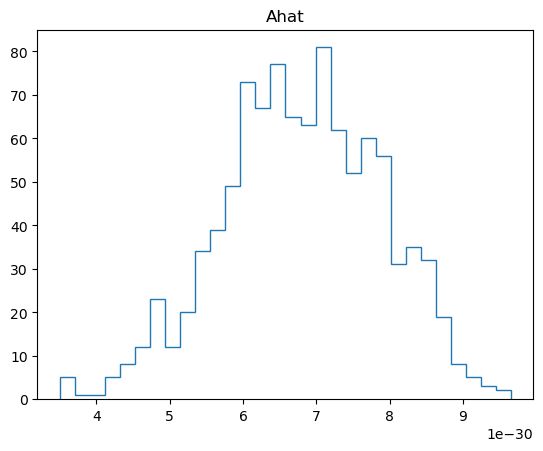

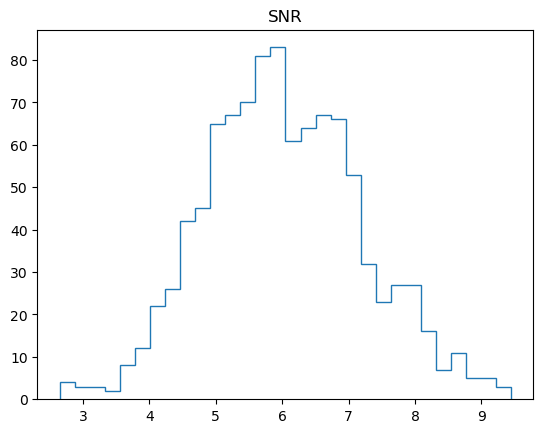

In [32]:
plt.hist(ahat,bins=30,histtype='step')
plt.title("Ahat")
plt.show()

plt.hist(snr,bins=30,histtype='step')
plt.title("SNR")
plt.show()

In [33]:
np.median(snr)

5.956567385625052

In [34]:
np.save("/Users/kalistaw/Desktop/OS_2023_data/ng_snr_vg_tspan_ppta_fx_gamma_dmgp_set.npy",snr)

In [ ]:
#NMOS in native PTA Space

In [14]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/ppta_dmgp_max.pkl', 'rb') as fp:
    dm_gp_max_like = pickle.load(fp)

In [15]:
c0=co.Core(corepath="/Users/kalistaw/Desktop/OS_2023_data/ng_dmgp_core_fx_gamma.h5")

Loading data from HDF5 file....


In [16]:
ng_array=c0.chain
ng_param_names=c0.params

In [17]:
ng_param_namescp=[]
for ky in ng_param_names:
    if "earth" not in ky:
        split=ky.split('_')
        split.insert(1,'ng')
        kynew='_'.join(split)
        ng_param_namescp.append(kynew)
    else:
        ng_param_namescp.append(ky)

In [18]:
for i in range(len(ng_param_namescp)):
    if ng_param_namescp[i]=='crn_ng_log10_A':
        ng_param_namescp[i]='gw_log10_A'
    elif ng_param_namescp[i]=='crn_ng_gamma':
        ng_param_namescp[i]='gw_gamma'
    else:
        pass

In [19]:
i=0
while i<len(ng_array):
    dictionary_of_values = dict(zip(ng_param_namescp, ng_array[i]))
    dictionary_of_valcp=dictionary_of_values.copy()
    for key, value in dm_gp_max_like.items():
        for ky,val in dictionary_of_values.items():
            if ky == key:
                dictionary_of_valcp[ky]=value
            else:
                pass
    list_ng_array=[]
    for ky,val in dictionary_of_valcp.items():
        list_ng_array.append(val)
    ng_array[i]=list_ng_array
    
    i+=1

In [20]:
chain=ng_array

In [21]:
for ky in ng_param_namescp:
    if ky not in pta.param_names:
        print(ky)

lnpost_ng
lnlike_ng
chain_ng_accept
pt_ng_chain_accept


In [22]:
for ky in pta.param_names:
    if ky not in ng_param_namescp:
        print(ky)

In [23]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd')
ostat_dip = opt_stat.OptimalStatistic(psrs, pta=pta, orf='dipole')
ostat_mono = opt_stat.OptimalStatistic(psrs, pta=pta, orf='monopole')

In [24]:
%%time
# (Note: It may take a few minutes to run this cell)
N = 1000   # number of times to compute the optimal statistic - official analysis used 10k - you can increase this if you don't mind the extra runtime
burn = int(0.25*chain.shape[0])   # estimate of when the chain has burned in

noisemarg_OS, noisemarg_OS_err = np.zeros(N), np.zeros(N)
noisemarg_OS_dip, noisemarg_OS_dip_err = np.zeros(N), np.zeros(N)
noisemarg_OS_mono, noisemarg_OS_mono_err = np.zeros(N), np.zeros(N)

for i in range(N):
    if i%100==0:
        print("Status: ", i, "/", N, " -- ", i/N*100, " %")
    # choose a set of noise values from the chain
    # make sure that you pull values from after the chain has burned in
    idx = np.random.randint(burn, chain.shape[0])
    
    # construct a dictionary with these parameter values
    param_dict = {}
    for p in ng_param_namescp:
        param_dict.update({p: chain[idx, ng_param_namescp.index(p)]})
    
    # compute the optimal statistic at this set of noise values and save in an array
    _, _, _, noisemarg_OS[i], noisemarg_OS_err[i] = ostat.compute_os(params=param_dict)

Status:  0 / 1000  --  0.0  %
Status:  100 / 1000  --  10.0  %
Status:  200 / 1000  --  20.0  %
Status:  300 / 1000  --  30.0  %
Status:  400 / 1000  --  40.0  %
Status:  500 / 1000  --  50.0  %
Status:  600 / 1000  --  60.0  %
Status:  700 / 1000  --  70.0  %
Status:  800 / 1000  --  80.0  %
Status:  900 / 1000  --  90.0  %
CPU times: user 19min 33s, sys: 4min 16s, total: 23min 49s
Wall time: 14min 56s


In [25]:
snr=noisemarg_OS/noisemarg_OS_err

In [26]:
np.save("/Users/kalistaw/Desktop/OS_2023_data/ng_pta_space_mar_snr_fx_gamma_dmgp_set.npy",snr)